# Lab 2: Gradient Descent Optimization

This notebook demonstrates how neural networks learn by minimizing a loss function using gradient descent. We visualize the optimization process on a simple parabolic function.

## Numerical Derivative Calculation

We implement numerical differentiation to approximate derivatives, which is the foundation of gradient-based optimization.

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

def get_random_number(min, max):
    return random.uniform(min, max)

def parabolic_function(x): 
    return x * x

def parabolic_function_der(x):
    return 2 * x
    
def derivative(f, x, step=1e-10):
    return ((f(x + step) - f(x)) / step)

x = np.linspace(-100, 100, 10000)
y = np.array([parabolic_function(f) for f in x])

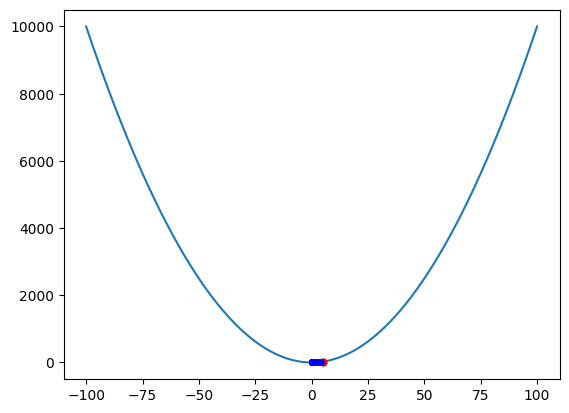

In [ ]:
xi = get_random_number(-100, 100)
yi = parabolic_function(xi)
# Plot the parabola
plt.plot(x, y)
# Plot the point as a big red marker
plt.plot(xi, yi, "ro", markersize=5)

xs = [xi]
ys = [yi]
derivatives = [derivative(parabolic_function, xi)]
step_size=1

for i in range(100):
    x_n = xs[i] - step_size if derivatives[i] >0 else xs[i] + step_size # x next
    
    y_n = parabolic_function(x_n)
    derivative_n = derivative(parabolic_function, x_n)
    xs.append(x_n)
    ys.append(y_n)
    derivatives.append(derivative_n)
    plt.plot(x_n, y_n, "bo", markersize=4)
    
plt.show()


## Fixed Step Size Gradient Descent

Demonstrates basic gradient descent with a **constant step size**. 

Starting from a random point on the parabola y = x², the algorithm:
1. Computes the derivative (gradient) at the current position
2. Takes a fixed-size step in the direction that decreases the function value
3. Repeats until convergence

**Limitation:** Fixed step size doesn't consider gradient magnitude, which can lead to inefficient optimization.

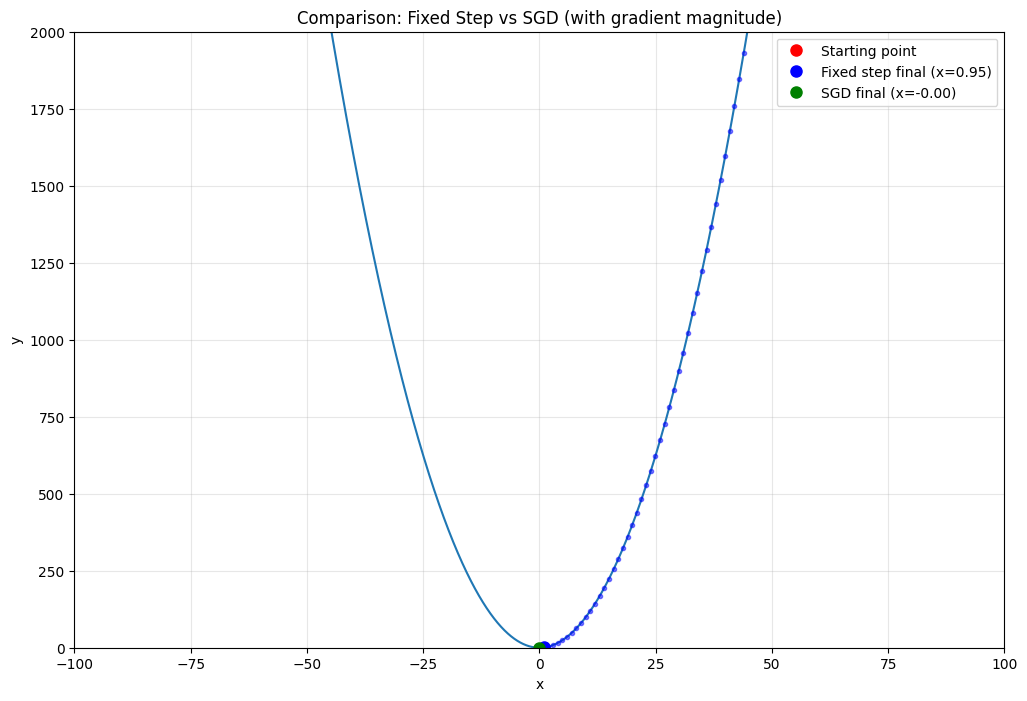

Starting point: x=48.95, y=2396.34
Fixed step - Final: x=0.95, y=0.91
SGD - Final: x=-0.00, y=0.00


In [63]:
xi = get_random_number(-100, 100)
yi = parabolic_function(xi)

# Plot the parabola
plt.figure(figsize=(12, 8))
plt.plot(x, y)
# Plot the starting point as a big red marker
plt.plot(xi, yi, "ro", markersize=8, label="Starting point")

# Fixed step approach (blue)
xs_fixed = [xi]
ys_fixed = [yi]
derivatives_fixed = [derivative(parabolic_function, xi)]
step_size = 1

# SGD approach (green) - using gradient magnitude
xs_sgd = [xi]
ys_sgd = [yi]
derivatives_sgd = [derivative(parabolic_function, xi)]
learning_rate = 0.5  # Smaller learning rate for SGD

for i in range(100):
    # Fixed step approach (your current method)
    x_n_fixed = (
        xs_fixed[i] - step_size if derivatives_fixed[i] > 0 else xs_fixed[i] + step_size
    )
    y_n_fixed = parabolic_function(x_n_fixed)
    derivative_n_fixed = derivative(parabolic_function, x_n_fixed)
    xs_fixed.append(x_n_fixed)
    ys_fixed.append(y_n_fixed)
    derivatives_fixed.append(derivative_n_fixed)
    plt.plot(x_n_fixed, y_n_fixed, "bo", markersize=3, alpha=0.5)

    # SGD approach (using gradient magnitude)
    x_n_sgd = xs_sgd[i] - learning_rate * derivatives_sgd[i]
    y_n_sgd = parabolic_function(x_n_sgd)
    derivative_n_sgd = derivative(parabolic_function, x_n_sgd)
    xs_sgd.append(x_n_sgd)
    ys_sgd.append(y_n_sgd)
    derivatives_sgd.append(derivative_n_sgd)
    plt.plot(x_n_sgd, y_n_sgd, "go", markersize=3, alpha=0.5)

# Plot final positions with larger markers
plt.plot(
    xs_fixed[-1],
    ys_fixed[-1],
    "bo",
    markersize=8,
    label=f"Fixed step final (x={xs_fixed[-1]:.2f})",
)
plt.plot(
    xs_sgd[-1], ys_sgd[-1], "go", markersize=8, label=f"SGD final (x={xs_sgd[-1]:.2f})"
)

plt.xlim(-100, 100)
plt.ylim(0, 2000)  # Zoom in on lower part of parabola
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison: Fixed Step vs SGD (with gradient magnitude)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Starting point: x={xi:.2f}, y={yi:.2f}")
print(f"Fixed step - Final: x={xs_fixed[-1]:.2f}, y={ys_fixed[-1]:.2f}")
print(f"SGD - Final: x={xs_sgd[-1]:.2f}, y={ys_sgd[-1]:.2f}")


## Comparison: Fixed Step vs. Gradient-Based Step (SGD)

This visualization compares two optimization strategies:

### Fixed Step (Blue points)
- Uses constant step size regardless of gradient magnitude
- Simple but inefficient: takes same-sized steps even when far from or close to the minimum

### SGD with Learning Rate (Green points)
- Step size proportional to gradient: `x_new = x_old - learning_rate × gradient`
- **Adaptive behavior:** larger steps when gradient is steep, smaller steps near the minimum
- More efficient convergence to the optimal solution

**Key insight:** Using gradient magnitude (SGD approach) is fundamental to training neural networks efficiently.